In [1]:
%pip install matplotlib pandas numpy seaborn nltk


Note: you may need to restart the kernel to use updated packages.


In [2]:
import nltk
import re
import string
from nltk.corpus import stopwords
nltk.download('punkt')
nltk.download('stopwords')
from nltk.tokenize import word_tokenize
from collections import Counter
import pandas as pd
from pandas import DataFrame 
from pandas import Series 
import matplotlib.pyplot as plt
import json
import seaborn as sns

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\pc\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\pc\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [3]:
def clean_data_message(st):
    st =  st.replace("#", '')
    st =  st.replace("\r", '')
    st =  st.replace("\n", '')
    return st


In [4]:
#đọc dữ liệu từ file data.csv
df = pd.read_csv("data.csv")
df['message_post'] = df['message_post'].apply(clean_data_message)# làm sạch 1 lần nữa message_post (do đọc từ file nên gây ra 1 vài chi tiết nhỏ như "\n" và "\r" trong message_post)


In [5]:
df # thay đổi clean hastag ở crawdata

,message_post,id_post,time_created,hours_time_created,total_comments,total_of_reactions,reactions_like,reactions_love,reactions_wow,reactions_haha,reactions_sad,reactions_angry,total_share,comments_details,source_picture,source_video,len_video
0,Tình mẹ bao la nặng như biển Lê Bảo,facebook.com/1521822118121953_675334698063723,2023-11-14T07:12:00+0000,7,16,514,213,2,0,296,3,0,2,"[{'name': 'Hoàng Thắng', 'id': '10003688155859...",https://scontent.fhan2-4.fna.fbcdn.net/v/t15.5...,https://scontent.fhan2-4.fna.fbcdn.net/v/t42.1...,01:06
1,Câu chuyện cảm động... gớt nước mắt VT Vlog,facebook.com/1521822118121953_675229141407612,2023-11-14T04:00:59+0000,4,454,4073,1113,11,10,2806,132,1,120,"[{'name': 'Nguyễn Quốc', 'id': '10001301556153...",https://scontent.fhan2-4.fna.fbcdn.net/v/t15.5...,https://scontent.fhan2-4.fna.fbcdn.net/v/t42.1...,02:37
2,Cứ thế mà áp dụng nha anh em :3,facebook.com/1521822118121953_675227631407763,2023-11-14T02:00:57+0000,2,2451,41612,16086,170,52,25055,243,6,918,"[{'name': 'Thanh Hào', 'id': '100005978594966'...",https://scontent.fhan2-4.fna.fbcdn.net/v/t15.5...,https://scontent.fhan2-4.fna.fbcdn.net/v/t42.1...,01:42
3,Ông cứu hộ chắc nghiên cứu thị trường kỹ lắm,facebook.com/1521822118121953_674869951443531,2023-11-13T13:00:27+0000,13,446,21698,7600,28,43,13851,172,4,195,"[{'name': 'Thùy Lâm', 'id': '100023875656693',...",https://scontent.fhan2-4.fna.fbcdn.net/v/t15.5...,https://scontent.fhan2-4.fna.fbcdn.net/v/t42.1...,00:52
4,Cũng cute Quang Truong,facebook.com/1521822118121953_674869198110273,2023-11-13T09:00:35+0000,9,5375,22518,6984,45,46,13690,1750,3,935,"[{'name': 'Truongw Pham Ngọc Quyenn', 'id': '1...",https://scontent.fhan2-4.fna.fbcdn.net/v/t15.5...,https://scontent.fhan2-4.fna.fbcdn.net/v/t42.1...,01:02
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,Trưởng thành cùng nhau bạn nhé,facebook.com/1521822118121953_635370968726763,2023-09-02T09:00:00+0000,9,112,41198,13061,103,76,27128,825,5,8,"[{'name': 'Trần Hoàn', 'id': '100062289170892'...",https://scontent.fhan2-4.fna.fbcdn.net/v/t39.3...,NaN,0
496,Nhìn là muốn ăn rồi,facebook.com/1521822118121953_635412755389251,2023-09-02T08:00:15+0000,8,91,3255,3019,3,0,213,19,1,19,"[{'name': 'CưƠng Nguyễn', 'id': '1000148076106...",https://scontent.fhan2-4.fna.fbcdn.net/v/t15.5...,https://scontent.fhan2-4.fna.fbcdn.net/v/t42.1...,00:49
497,Vai diễn để đời,facebook.com/1521822118121953_635367918727068,2023-09-02T07:00:00+0000,7,33,44735,28268,227,55,15866,315,4,3,"[{'name': 'Khoa Phạm', 'id': '100007517228639'...",https://scontent.fhan2-4.fna.fbcdn.net/v/t39.3...,NaN,0
498,Sau nhớ giữ chặt nhé,facebook.com/1521822118121953_635401235390403,2023-09-02T04:00:43+0000,4,60,411935,167348,2261,533,239170,2608,15,11,"[{'name': 'Đặng Nhật', 'id': '100030766430759'...",https://scontent.fhan2-4.fna.fbcdn.net/v/t15.5...,https://scontent.fhan2-4.fna.fbcdn.net/v/t42.1...,00:49


In [6]:
df['comments_details'][0]

"[{'name': 'Hoàng Thắng', 'id': '100036881558597', 'message': 'Trần Thanh Hương', 'time_created': '07', 'id_tag': '100003946438349'}, {'name': 'Vi Thị Phương Thảo', 'id': '100003993594420', 'message': 'Nguyễn Quý', 'time_created': '07', 'id_tag': '100005336439749'}, {'name': 'Nguyễn Dũng', 'id': '100051362597221', 'message': 'Bích Ngọc', 'time_created': '08', 'id_tag': '100055924734840'}, {'name': 'Trần Đạt', 'id': '100063736323085', 'message': 'Puw Wie :)))', 'time_created': '07', 'id_tag': '100063694201989'}, {'name': 'Thanh Mio', 'id': '100033584205733', 'message': 'Con có hiếu ghê', 'time_created': '07', 'id_tag': ''}, {'name': 'Hoàng Võ', 'id': '100045901773366', 'message': 'Cha bố nhà anh, con vs cái ', 'time_created': '08', 'id_tag': ''}, {'name': 'VladimirPutin', 'category': 'News & media website', 'category_list': [{'id': '2709', 'name': 'News & media website'}, {'id': '2233', 'name': 'Media/News Company'}], 'id': '111965198678057', 'message': 'Tiên sư thằng con', 'time_create

In [7]:
#link các bài viết có lượt tương tác lớn nhất(trong 500 bài viết gần đây)
print(df[df['total_of_reactions']==df['total_of_reactions'].max()]['id_post'])
#các bài viết có lượt tương tác lớn nhất(trong 500 bài viết gần đây)
df[df['total_of_reactions']==df['total_of_reactions'].max()]


48     facebook.com/1521822118121953_670309978566195
73     facebook.com/1521822118121953_668279572102569
98     facebook.com/1521822118121953_665107712419755
123    facebook.com/1521822118121953_662965575967302
148    facebook.com/1521822118121953_661267642803762
173    facebook.com/1521822118121953_658459763084550
198    facebook.com/1521822118121953_656070883323438
223    facebook.com/1521822118121953_653796226884237
248    facebook.com/1521822118121953_651388387125021
273    facebook.com/1521822118121953_649606333969893
298    facebook.com/1521822118121953_646889420908251
323    facebook.com/1521822118121953_646413457622514
348    facebook.com/1521822118121953_644984061098787
373    facebook.com/1521822118121953_642946197969240
398    facebook.com/1521822118121953_641361368127723
423    facebook.com/1521822118121953_639290541668139
448    facebook.com/1521822118121953_638787588385101
473    facebook.com/1521822118121953_637322835198243
498    facebook.com/1521822118121953_635401235

,message_post,id_post,time_created,hours_time_created,total_comments,total_of_reactions,reactions_like,reactions_love,reactions_wow,reactions_haha,reactions_sad,reactions_angry,total_share,comments_details,source_picture,source_video,len_video
48,Không ngờ tới luôn =)) mycute22215,facebook.com/1521822118121953_670309978566195,2023-11-05T09:00:53+0000,9,16076,411935,167348,2261,533,239170,2608,15,5102,"[{'name': 'Đỗ Nhị Khuê', 'id': '10000256450437...",https://scontent.fhan2-4.fna.fbcdn.net/v/t15.5...,https://scontent.fhan2-4.fna.fbcdn.net/v/t42.1...,00:32
73,Có ông bố chất lượng thật duyvuonght38,facebook.com/1521822118121953_668279572102569,2023-10-31T07:00:03+0000,7,1400,411935,167348,2261,533,239170,2608,15,1332,"[{'name': 'Thu Thanh Trần', 'id': '10001254555...",https://scontent.fhan2-4.fna.fbcdn.net/v/t15.5...,https://scontent.fhan2-4.fna.fbcdn.net/v/t42.1...,01:10
98,Ngày đi ngàn dặm mỗi tội không leo núi được,facebook.com/1521822118121953_665107712419755,2023-10-26T14:00:01+0000,14,1567,411935,167348,2261,533,239170,2608,15,1189,"[{'name': 'Đặng Khánh Duy', 'id': '10003352564...",https://scontent.fhan2-4.fna.fbcdn.net/v/t15.5...,https://scontent.fhan2-4.fna.fbcdn.net/v/t42.1...,01:08
123,Không chơi thì next,facebook.com/1521822118121953_662965575967302,2023-10-22T13:00:05+0000,13,11035,411935,167348,2261,533,239170,2608,15,2006,"[{'name': 'Đặng Hồng Dương', 'id': '1000396426...",https://scontent.fhan2-4.fna.fbcdn.net/v/t15.5...,https://scontent.fhan2-4.fna.fbcdn.net/v/t42.1...,01:18
148,"Ván bida thần kỳ, cứ chọt là mọc ra lỗ",facebook.com/1521822118121953_661267642803762,2023-10-18T04:05:26+0000,4,2717,411935,167348,2261,533,239170,2608,15,1141,"[{'name': 'Mia Tran', 'id': '100005850937200',...",https://scontent.fhan2-4.fna.fbcdn.net/v/t15.5...,https://scontent.fhan2-4.fna.fbcdn.net/v/t42.1...,01:04
173,Nhẹ không thích cứ thích mạnh cơ,facebook.com/1521822118121953_658459763084550,2023-10-13T13:00:30+0000,13,6054,411935,167348,2261,533,239170,2608,15,1903,"[{'name': 'Đặng Ngọc Quang', 'id': '1000296535...",https://scontent.fhan2-4.fna.fbcdn.net/v/t15.5...,https://scontent.fhan2-4.fna.fbcdn.net/v/t42.1...,00:53
198,Một track bình thiên hạ,facebook.com/1521822118121953_656070883323438,2023-10-09T13:00:02+0000,13,8619,411935,167348,2261,533,239170,2608,15,8347,"[{'name': 'Thoại Hồ', 'id': '100039920161996',...",https://scontent.fhan2-4.fna.fbcdn.net/v/t15.5...,https://scontent.fhan2-4.fna.fbcdn.net/v/t42.1...,01:17
223,Nếu biết ngày mai em lấy chồng...,facebook.com/1521822118121953_653796226884237,2023-10-05T07:00:31+0000,7,161,411935,167348,2261,533,239170,2608,15,101,"[{'name': 'Phạm Ngọc Tưởng', 'id': '1000396499...",https://scontent.fhan2-4.fna.fbcdn.net/v/t15.5...,https://scontent.fhan2-4.fna.fbcdn.net/v/t42.1...,01:02
248,"Gia đình bốc thuốc nam nổi tiếng nhất vùng, ấy...",facebook.com/1521822118121953_651388387125021,2023-09-30T13:00:06+0000,13,263,411935,167348,2261,533,239170,2608,15,1257,"[{'name': 'Anh Da Vàng', 'category': 'Local bu...",https://scontent.fhan2-4.fna.fbcdn.net/v/t15.5...,https://scontent.fhan2-4.fna.fbcdn.net/v/t42.1...,00:35
273,Anh rất tốt nhưng em rất tiếc,facebook.com/1521822118121953_649606333969893,2023-09-27T14:00:01+0000,14,384,411935,167348,2261,533,239170,2608,15,42,"[{'name': 'Nguyễn Thành', 'id': '1000090541207...",https://scontent.fhan2-4.fna.fbcdn.net/v/t39.3...,NaN,0


thời điểm được đăng bài nhiều nhất trong ngày của 500 bài viết gần đây : 9h


Text(0.5, 1.0, 'Tổng số bài đăng theo thời điểm trong ngày của 500 bài đăng gần đây')

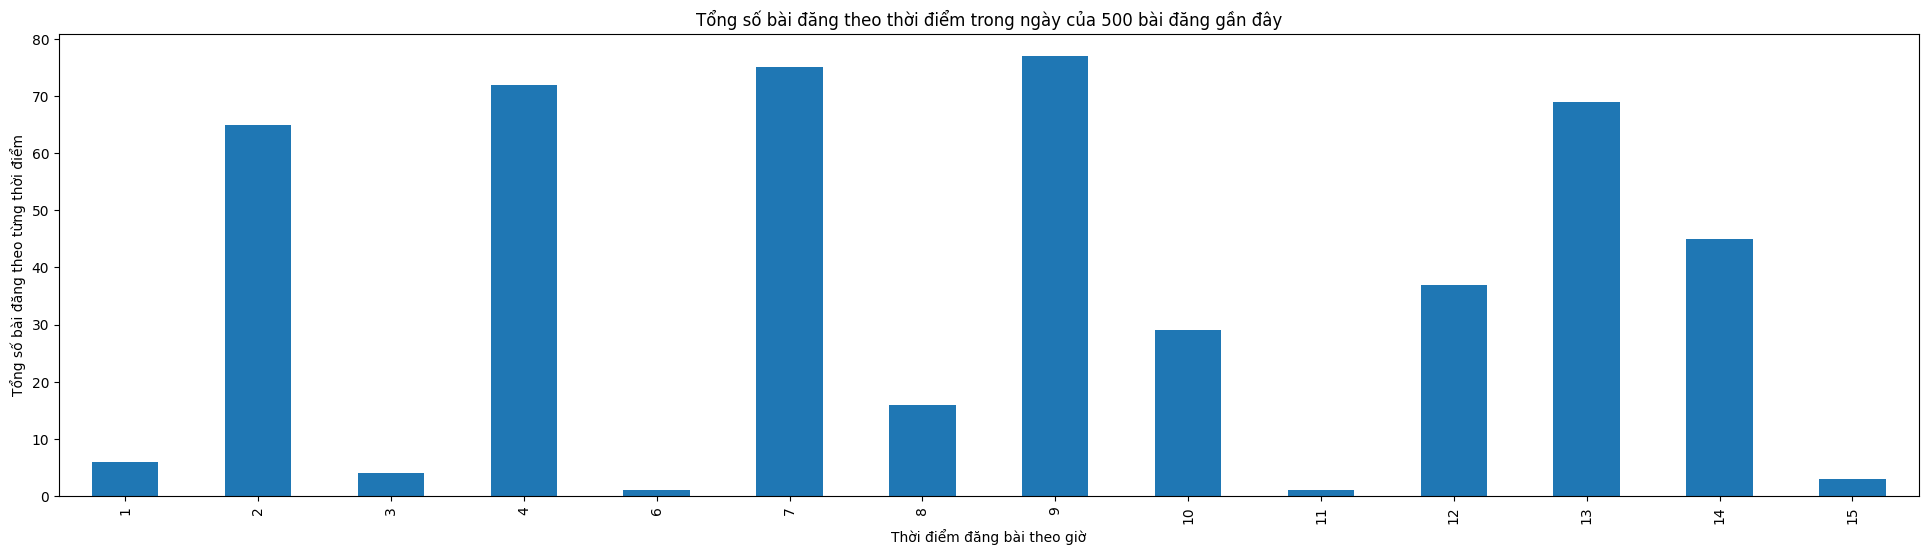

In [8]:
# thời điểm trong ngày được đăng bài nhiều nhất trong 500 bài viết gần đây
print("thời điểm được đăng bài nhiều nhất trong ngày của 500 bài viết gần đây : %sh" % df['hours_time_created'].mode().iloc[0], sep = ' ')
#lược đồ trực quan:
dia1 = df['hours_time_created'].value_counts().sort_index().plot(kind = 'bar',figsize=(24,6))
dia1.set_xlabel('Thời điểm đăng bài theo giờ')
dia1.set_ylabel('Tổng số bài đăng theo từng thời điểm')
dia1.set_title('Tổng số bài đăng theo thời điểm trong ngày của 500 bài đăng gần đây')

In [9]:
#xu hướng comments vào giờ nào()
#
data_comments = []
with open('raw_comments.json', 'r') as handler:
    data_comments = json.load(handler)
data_comments[0][0]['time_created']
#cho vào list_time_comments_Created
list_time_comments_created = []
for i in data_comments:
    for j in i:
        list_time_comments_created.append(j['time_created'])
list_time_comments_created.sort(reverse=True)        

Text(0, 0.5, 'tổng số lượng comments')

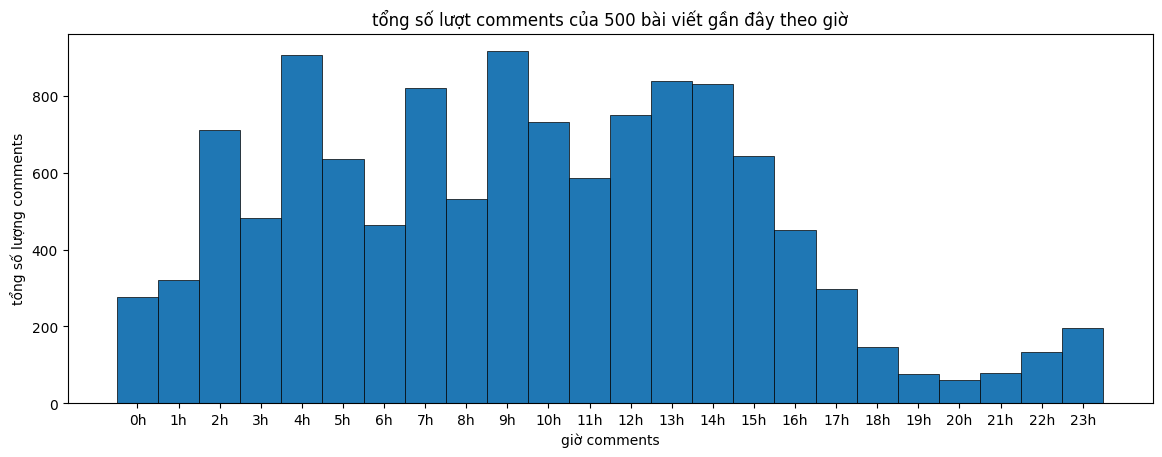

In [10]:
#lược đồ trực quan
series_time_comments = pd.Series(list_time_comments_created)
fig_time_comments ,ax_time_comments = plt.subplots(1,1)
y = [(str(i)+'h')for i in range (0,24)]
ax_time_comments.bar(y, series_time_comments.value_counts().sort_index().values ,width=1, edgecolor="black", linewidth=0.5)
fig_time_comments
fig_time_comments.set_figwidth(14)
ax_time_comments.set_title('tổng số lượt comments của 500 bài viết gần đây theo giờ')
ax_time_comments.set_xlabel('giờ comments')
ax_time_comments.set_ylabel('tổng số lượng comments')

In [11]:
df['total_of_reactions']

0         514
1        4073
2       41612
3       21698
4       22518
        ...  
495     41198
496      3255
497     44735
498    411935
499      4201
Name: total_of_reactions, Length: 500, dtype: int64

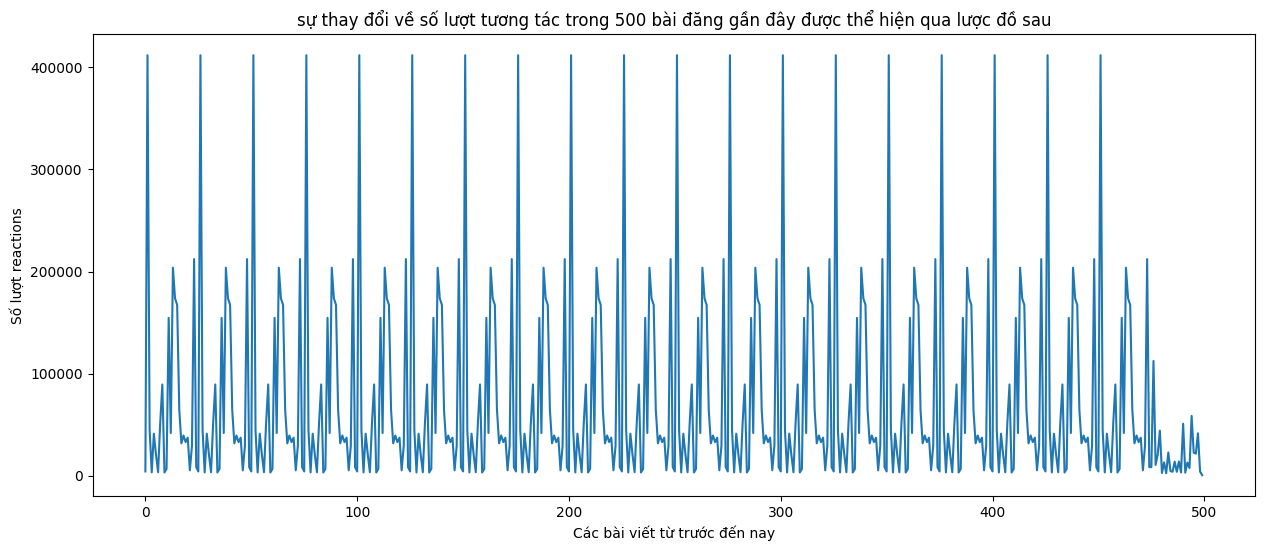

In [12]:
#sự they đổi về số lượt tương tác trong 500 bài đăng gần đây được thể hiện qua lược đồ sau
fig, ax = plt.subplots(1,1)
plot_reactions = pd.DataFrame(df['total_of_reactions'],index=[i for i in range(0,500)])
plot_reactions_index = plot_reactions.index
plot_reactions = plot_reactions.iloc[::-1]
plot_reactions.index = plot_reactions_index
ax.plot(plot_reactions)
ax.set_title('sự thay đổi về số lượt tương tác trong 500 bài đăng gần đây được thể hiện qua lược đồ sau')
ax.set_ylabel('Số lượt reactions')
ax.set_xlabel('Các bài viết từ trước đến nay')
fig.set_figheight(6)
fig.set_figwidth(15)
#trong lược đồ dưới đây, các bài viết theo thứ tự từ xa nhất đến gần nhất(từ trái sang phải)

In [13]:
#các từ khóa xuất hiện nhiều nhất trong các bài đăng
list_keyword_and_frequency = Counter(" ".join(df['message_post']).split()).most_common(5) #lấy 5 từ
index_lkaf = []
value_lkaf = []
for i in list_keyword_and_frequency:
    index_lkaf.append(i[0])
    value_lkaf.append(i[1])
visualization_list_keyword_and_frequency = pd.Series(value_lkaf, index=index_lkaf)


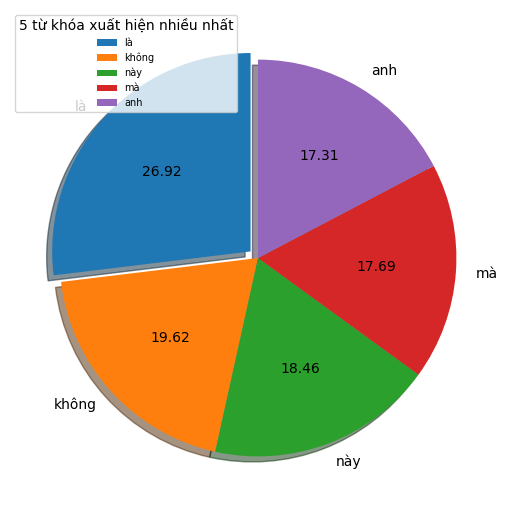

In [14]:
#lược đồ trực quan
fig, ax = plt.subplots(1,1)
ax.pie(visualization_list_keyword_and_frequency,shadow=True, labels=visualization_list_keyword_and_frequency.index, startangle=90, explode=(0.05,0,0,0,0),autopct='%.2f')
ax.legend(title = '5 từ khóa xuất hiện nhiều nhất',loc=2,prop={'size':7})
fig.set_figheight(20)#checkpoint



In [15]:
#hastag xuất hiện nhiều nhất
list_hastag = []
with open('file_hastag.txt','r',encoding='utf8') as handler:
     list_hastag = handler.readlines()
for i in range(len(list_hastag)):
    list_hastag[i] = list_hastag[i].replace("\n",'')
series_hastag = pd.Series(list_hastag)  
series_hastag.value_counts()  # => page có ít số lượng các hastag khác nhau nên page này không để quảng cáo

  

anhdaden                            483
anhdavang                             5
HangHieuGiaHoi                        1
AHauntingInVeniceVN                   1
                                      1
BiaTuyetEdelweiss                     1
Edelweiss                             1
BeerxologyMaster                      1
Edelweisscocktail                     1
TheatorVN                             1
ParodyMusic                           1
HoaCưới                               1
HuỳnhLập                              1
MùiGiaTruyền                          1
VPIM2023                              1
HaNoiVibes                            1
VPBankHanoiInternationalMarathon      1
Kplus                                 1
TheMarvelsVN                          1
SaleBomTan                            1
Lazada1111                            1
SanDealHoi                            1
Name: count, dtype: int64

In [41]:
# tương quan giữa số lượt reactions và số lượt bình luận



In [ ]:
# [i for i in range(1,501)], df['reactions_like'],[i for i in range(1,501)],df['reactions_love'],
#                  [i for i in range(1,501)], df['reactions_wow'],[i for i in range(1,501)], df['reactions_haha'],
#                  [i for i in range(1,501)], df['reactions_sad'],[i for i in range(1,501)], df['reactions_angry'],
#                  [i for i in range(1,501)], df['total_comments']

Text(0.5, 0, 'Các bài viết')

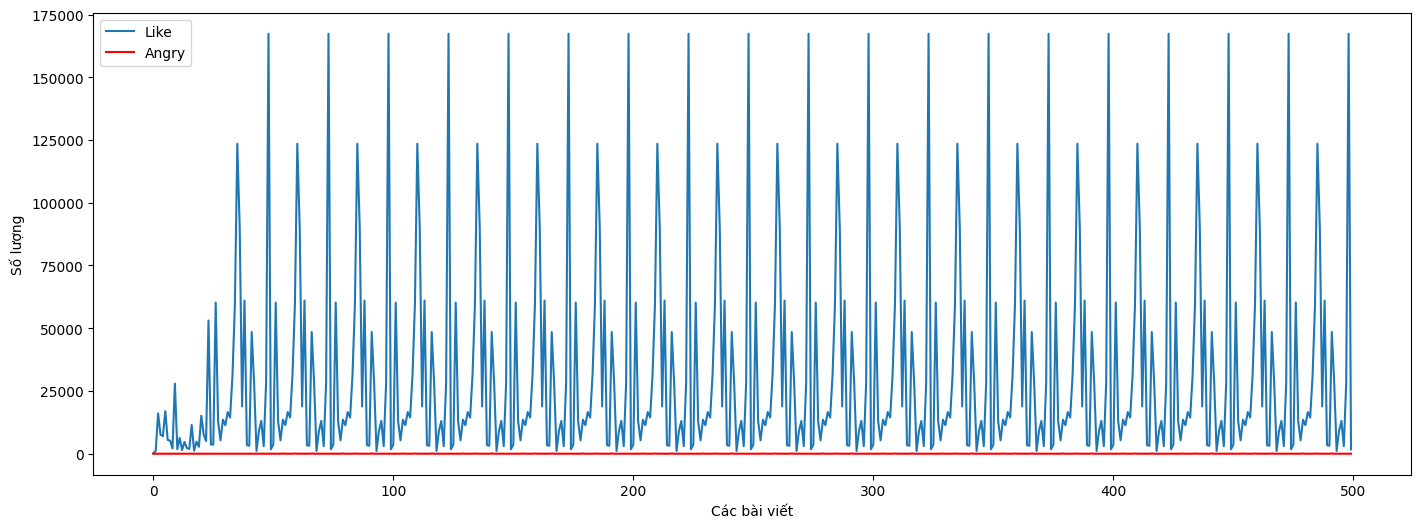

In [16]:
#tương quan giữa Like và Angry
fig_six_at ,axis_six_at = plt.subplots(1,1)
axis_six_at.plot( df['reactions_like'],label='Like')
axis_six_at.plot(df['reactions_angry'],label='Angry',color='r')
axis_six_at.legend()
fig_six_at.set_figwidth(17)
fig_six_at.set_figheight(6)
#số lượng Like áp đảo rất nhiều lần so với số lượng angry theo như đồ thị thì số angry loanh quanh ở mức 0 => page được nhiều người yêu thích
axis_six_at.set_ylabel('Số lượng')
axis_six_at.set_xlabel('Các bài viết')

Text(0.5, 0, 'Các bài viết')

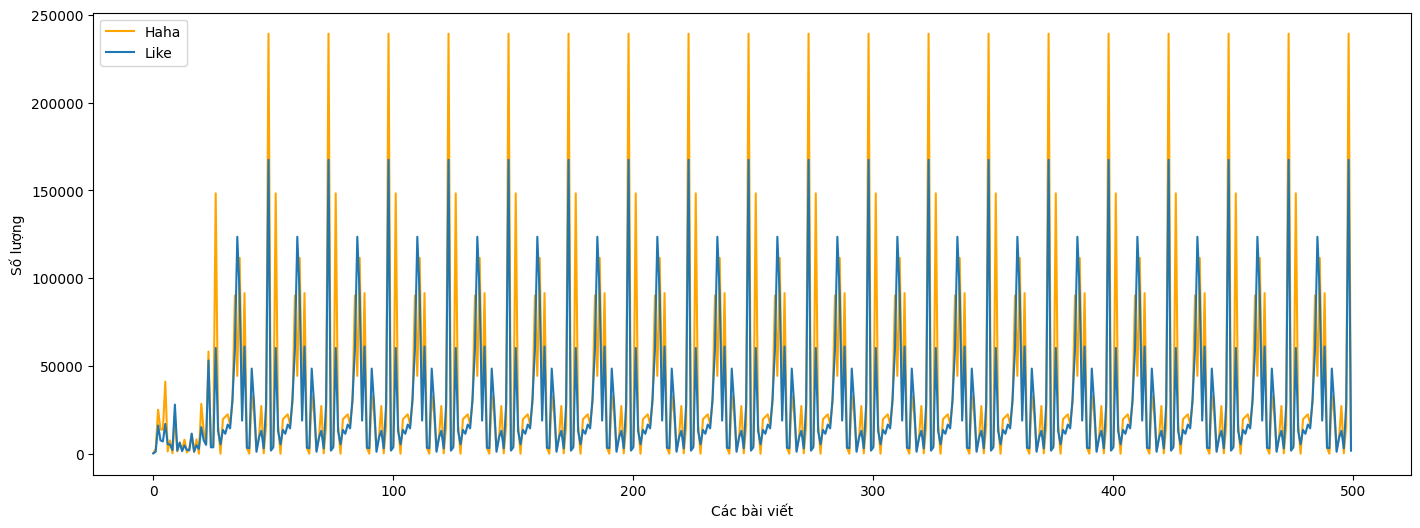

In [17]:
#tương quan giữa Haha và Like
fig_six_at_1 ,axis_six_at_1 = plt.subplots(1,1)
axis_six_at_1.plot( df['reactions_haha'],label='Haha',color='orange')
axis_six_at_1.plot(df['reactions_like'],label='Like')
axis_six_at_1.legend()
fig_six_at_1.set_figwidth(17)
fig_six_at_1.set_figheight(6)
axis_six_at_1.set_ylabel('Số lượng')
axis_six_at_1.set_xlabel('Các bài viết')
#số lượng like khá nhiều nhưng số lượng haha còn nhiều hơn hẳn chứng tỏ các bài viết của page này rất mang tính giải trí(nếu không có tính giải trí thì người xem sẽ chỉ tiện tay ấn like rồi bỏ qua)

Text(0.5, 0, 'Các bài viết')

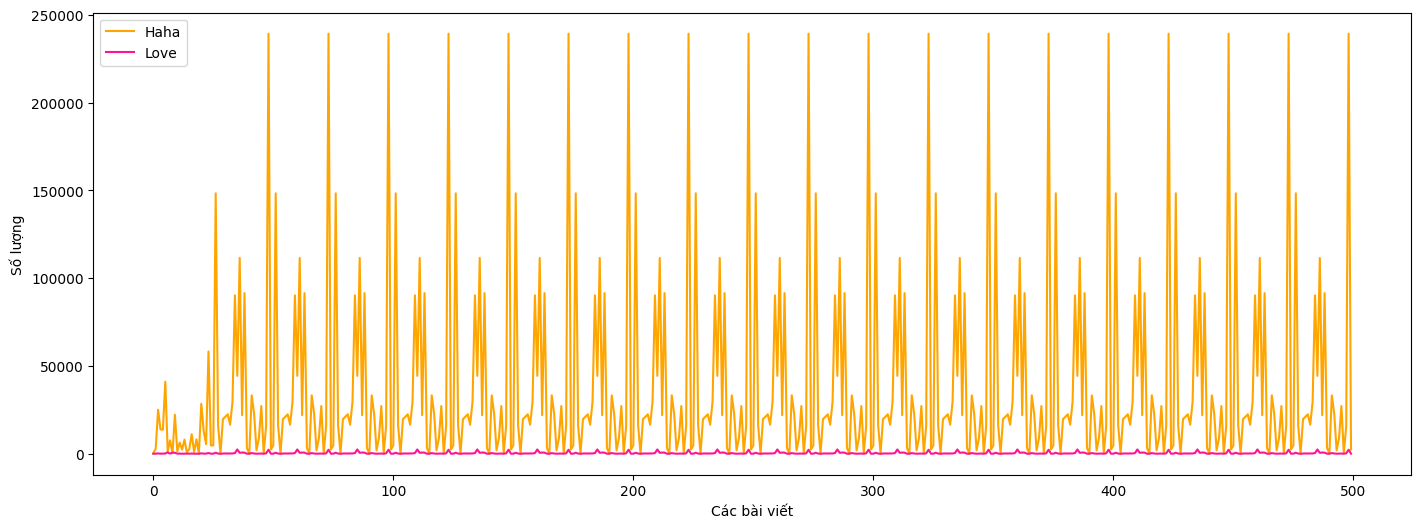

In [18]:
#tương quan giữa Haha và Love
fig_six_at_2 ,axis_six_at_2 = plt.subplots(1,1)
axis_six_at_2.plot( df['reactions_haha'],label='Haha',color='orange')
axis_six_at_2.plot(df['reactions_love'],label='Love',color='deeppink')
axis_six_at_2.legend()
fig_six_at_2.set_figwidth(17)
fig_six_at_2.set_figheight(6)
axis_six_at_2.set_ylabel('Số lượng')
axis_six_at_2.set_xlabel('Các bài viết')
#số lượng các bài viết có tính nhân văn của page hơi ít(nhân văn thì chả ai đi thả haha cả)

Text(0.5, 0, 'Các bài viết')

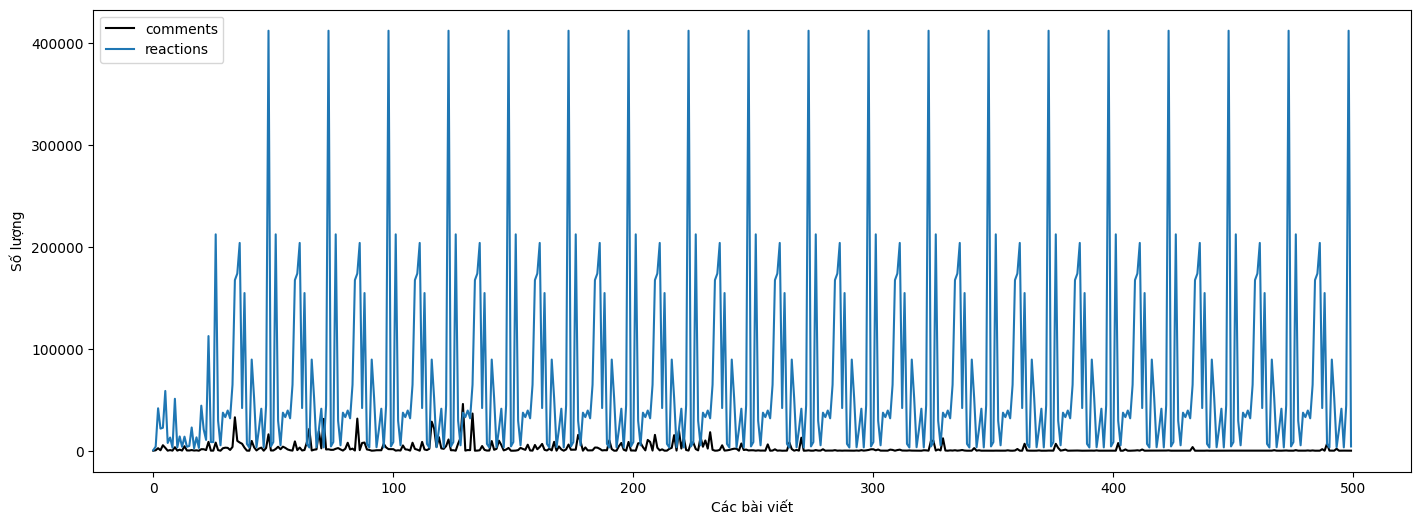

In [19]:
#Tương quan giữa số lượng reactions và số lượng comments
fig_six_at_3 ,axis_six_at_3 = plt.subplots(1,1)
axis_six_at_3.plot( df['total_comments'],label='comments', color = 'black')
axis_six_at_3.plot(df['total_of_reactions'],label='reactions')
axis_six_at_3.legend()
fig_six_at_3.set_figwidth(17)
fig_six_at_3.set_figheight(6)
axis_six_at_3.set_ylabel('Số lượng')
axis_six_at_3.set_xlabel('Các bài viết')
#số lượt bình luận so với số lượt reactions hơi kém, nội dung truyền tải của bài viết( video của bài viết , ảnh của bài viết,text) là tương đối rõ ràng , nhưng không đủ sâu sắc về các vấn đề hiện tại trong xã hội mà mọi người quan tâm để mọi người tham gia bình luận

In [56]:
no_video = df[df['len_video'] == '0']['len_video'].count()
video = 500 - no_video
series_video=[]
for i in range(video):
    series_video.append('có video')
for i in range(no_video):
    series_video.append('không video')   
plt_series = pd.Series(series_video)     

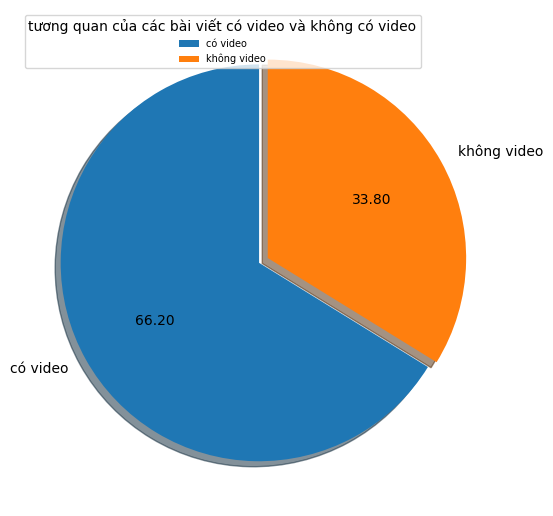

In [58]:
fig_video, ax_video = plt.subplots(1,1)
ax_video.pie(plt_series.value_counts(),shadow=True, labels=plt_series.value_counts().index, startangle=90, explode=(0.05,0),autopct='%.2f')
ax_video.legend(title = 'tương quan của các bài viết có video và không có video',loc=2,prop={'size':7})
fig_video.set_figheight(20)#checkpoint

In [24]:
with open('user_data_js.json', 'r') as handler:
    rea = json.load(handler)

JSONDecodeError: Expecting value: line 1 column 1 (char 0)

In [5]:
rea # số 15 là có đầy đủ ngày tháng năm sinh
#số 4 là có đầy đủ các trường cần lấy nhưng birthday thiếu năm sinh

[{'gender': 'female', 'name': 'Lê Thùy Trâm', 'id': '100073631839137'},
 {'gender': 'male',
  'hometown': {'id': '110240662338586', 'name': 'Điện Bàn'},
  'name': 'Tường Huy',
  'id': '100025932240893'},
 {'education': [{'school': {'id': '109023919492786',
     'name': 'Trường Cao đẳng Công nghệ cao Đồng Nai'},
    'type': 'College',
    'id': '789696838218119'},
   {'school': {'id': '743811409002144', 'name': 'Trường Đại Học Trà Vinh'},
    'type': 'College',
    'id': '265262718308617'},
   {'school': {'id': '153055064737854', 'name': 'Truong THPT Song Ray'},
    'type': 'High School',
    'id': '835525810301888'}],
  'gender': 'male',
  'hometown': {'id': '101881563186877', 'name': 'Cẩm Mỹ'},
  'name': 'Mai Kết Thương',
  'id': '100015334296634'},
 {'gender': 'female', 'name': 'Linh Linh', 'id': '100074257460620'},
 {'birthday': '04/13',
  'education': [{'school': {'id': '1432588070291470',
     'name': 'Học Viện Cảnh Sát Nhân Dân'},
    'type': 'College',
    'id': '194185565941429